In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data = np.array(iris)
nvar = data.shape[1]
datax = data[:,0:nvar-1]
datay = data[:,-1]

In [20]:
datax_scale = datax
for i in range(nvar-1):
    datax_scale[:,i] = (datax[:,i]-np.mean(datax[:,i]))/np.std(datax[:,i])

In [21]:
print(np.mean(datax_scale[:,3]), np.std(datax_scale[:,3]))

-1.2434497875801754e-16 1.0


In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', random_state=122)
kmeans.fit(datax_scale)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=122, tol=0.0001, verbose=0)

In [56]:
kmeans.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [57]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [58]:
datay

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [59]:
datay_num = datay
datay_num[np.where(datay == 'setosa')] = 0
datay_num[np.where(datay == 'versicolor')] = 1
datay_num[np.where(datay == 'virginica')] = 2

In [60]:
datay_num = np.array(datay_num, dtype=int)

In [61]:
y_compare = np.array([datay_num, kmeans.labels_])

In [62]:
y_compare

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(datax_scale, kmeans.labels_)

0.45994823920518635

In [64]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [66]:
#single_clustering = AgglomerativeClustering(linkage='single', n_clusters=3).fit(datax)
complete_clustering = AgglomerativeClustering(linkage='complete', n_clusters=3).fit(datax)

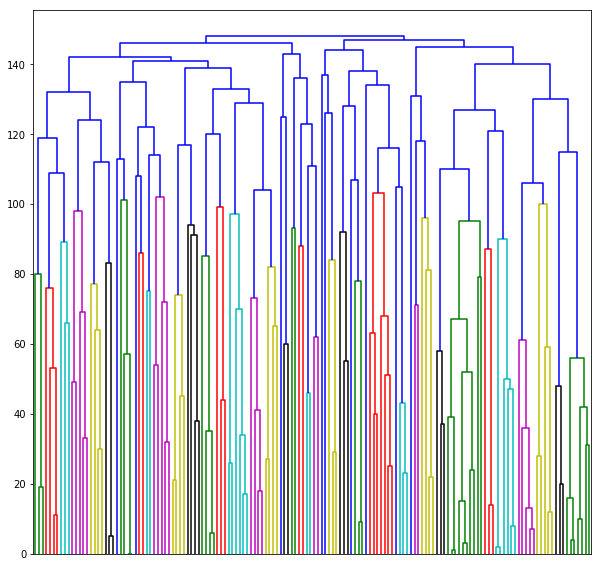

In [69]:
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = complete_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = datax_scale.shape[0], labels = complete_clustering.labels_, 
           show_contracted=True, no_labels = True, )
plt.show()